# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [70]:
# Load pickled data
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle
import tensorflow as tf
import cv2
import pandas as pd
# Visualizations will be shown in the notebook.
%matplotlib inline

# TODO: Fill this in based on where you saved the training and testing data

training_file = "data/train.p"
validation_file= "data/valid.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [59]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
flag_classes = set(y_train)
n_classes = (len(flag_classes))

n_validation = len(y_validation)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Number of validation =", n_validation)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43
Number of validation = 4410


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

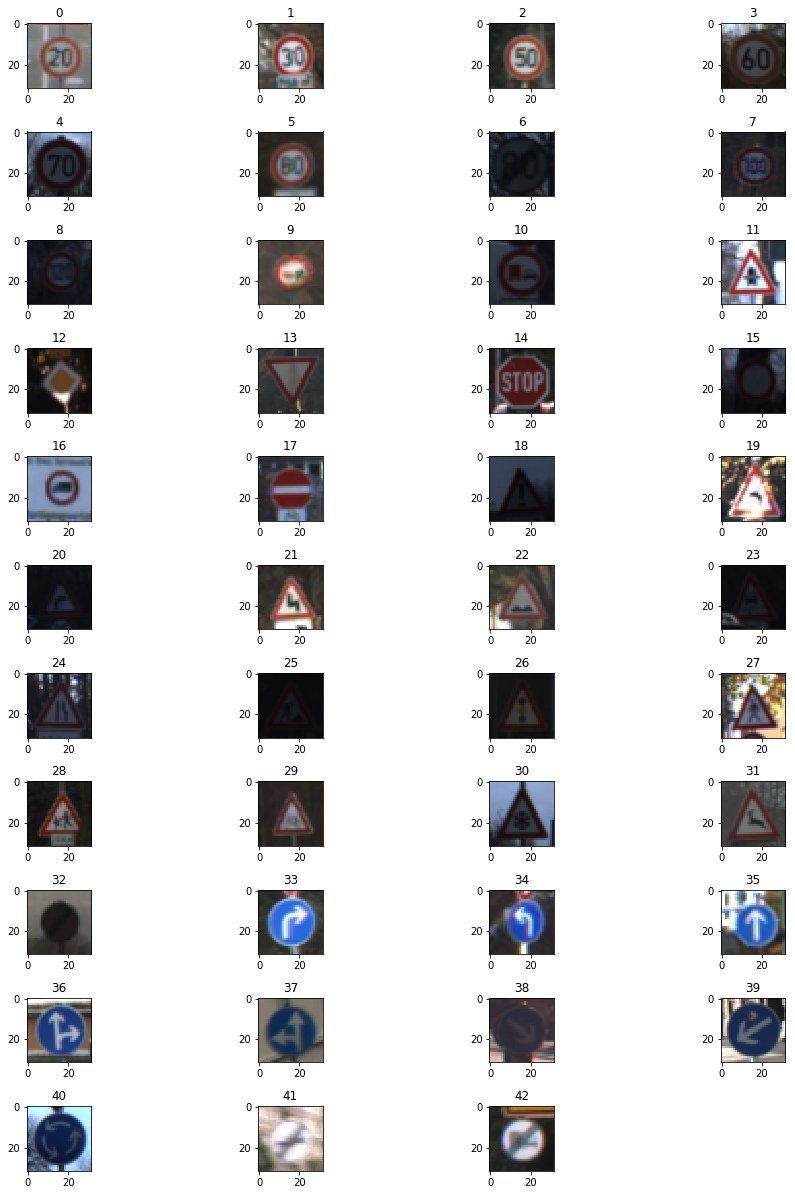

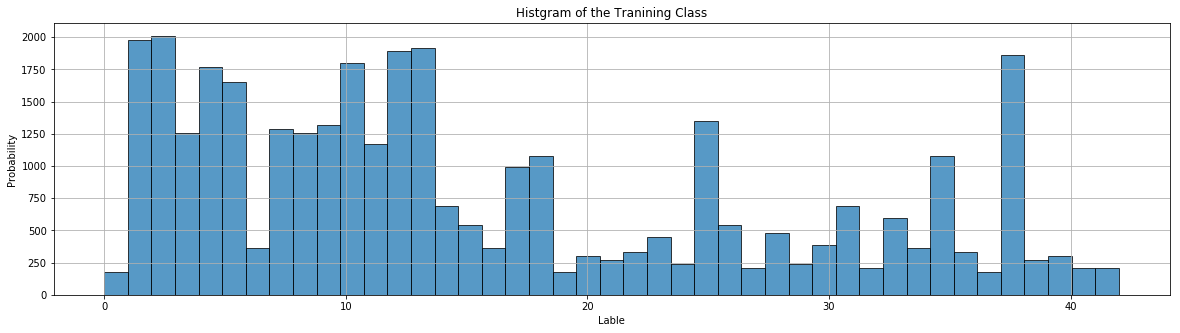

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
plt.figure(figsize=(13, 30))
for i in range(n_classes):
    plt.subplot(20, 4, i+1)
    sameClass = X_train[y_train == i]
    index = random.randint(0, len(sameClass))
    plt.imshow(sameClass[index])
    plt.title(i)
plt.tight_layout()
plt.show()

#Plot number of images per class
plt.figure(figsize=(20, 5))
n, bins, patches = plt.hist(y_train, n_classes, histtype='bar', ec='black', alpha=0.75)
plt.xlabel('Lable')
plt.ylabel('Probability')
plt.title(r'Histgram of the Tranining Class')
plt.grid(True)

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**Check Pointing**

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [34]:
import cv2
img_size = 32

def sharpen_img(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)

def transform_img(img_in):
    img_in = img_in.copy()
    img_out= sharpen_img(img_in)
    img_out = cv2.cvtColor(img_in, cv2.COLOR_RGB2YUV)
    img_out[:,:,0] = cv2.equalizeHist(img_out[:,:,0])
    return img_out[:,:,0]

def random_rotate_img(img):
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 30.0*np.random.rand()-15
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])

def random_scale_img(img):
    img2=img.copy()
    sc_y=0.4*np.random.rand()+1.0
    img2=cv2.resize(img, None, fx=1, fy=sc_y, interpolation = cv2.INTER_CUBIC)
    dy = int((img2.shape[1]-img.shape[0])/2)
    end = img.shape[1]-dy
    img2 = img2[dy:end,:,:]
    assert img2.shape[0] == img_size
    return img2
def image_translate(img):
    x = img.shape[0]
    y = img.shape[1]

    x_shift = np.random.uniform(-0.3 * x, 0.3 * x)
    y_shift = np.random.uniform(-0.3 * y, 0.3 * y)

    shift_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    shift_img = cv2.warpAffine(img, shift_matrix, (x, y))

    return shift_img
def image_rotate(img):
    row, col, channel = img.shape

    angle = np.random.uniform(-60, 60)
    rotation_point = (row / 2, col / 2)
    rotation_matrix = cv2.getRotationMatrix2D(rotation_point, angle, 1)

    rotated_img = cv2.warpAffine(img, rotation_matrix, (col, row))
    return rotated_img

def image_shear(img):
    x, y, channel = img.shape

    shear = np.random.randint(5,15)
    pts1 = np.array([[5, 5], [20, 5], [5, 20]]).astype('float32')
    pt1 = 5 + shear * np.random.uniform() - shear / 2
    pt2 = 20 + shear * np.random.uniform() - shear / 2
    pts2 = np.float32([[pt1, 5], [pt2, pt1], [5, pt2]])

    M = cv2.getAffineTransform(pts1, pts2)
    result = cv2.warpAffine(img, M, (y, x))
    return result

def image_blur(img):
    r_int = np.random.randint(0, 2)
    odd_size = 2 * r_int + 1
    return cv2.GaussianBlur(img, (odd_size, odd_size), 0)

def image_gamma(img):
    gamma = np.random.uniform(0.3, 1.5)
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    new_img = cv2.LUT(img, table)
    return new_img


def augment_img(img):
    img = img.copy()
    randCom = np.random.randint(0, 2, [1, 5]).astype('bool')[0]
    if randCom[0]:
        img = image_translate(img)
    if randCom[1]:
        img = image_rotate(img)
    if randCom[2]:
        img = image_shear(img)
    if randCom[3]:
        img = image_blur(img)
    if randCom[4]:
        img = image_gamma(img)    
        
    return transform_img(img)

In [71]:


# Transform all images and augment training datfa
X_train_transf = list()
y_train_transf = list()
X_test_transf = list()
X_valid_transf = list()

# make the validation imge
for ii in tqdm(range(X_validation.shape[0])):
    img = X_validation[ii]
    img = transform_img(img)
    img.shape = (1,) + img.shape + (1,)
    X_valid_transf.append(img)


# make the test image
for ii in tqdm(range(X_test.shape[0])):
    img = X_test[ii]
    img = transform_img(img)
    img.shape = (1,) + img.shape + (1,)
    X_test_transf.append(img)

X_test_transf = np.concatenate(X_test_transf,axis=0)

X_valid_transf = np.concatenate(X_valid_transf,axis=0)


100%|██████████| 12630/12630 [00:00<00:00, 14569.58it/s]


In [72]:
# make the train image
for ii in tqdm(range(X_train.shape[0])):
    img = X_train[ii]
    label = y_train[ii]
    imgout = transform_img(img)
    imgout.shape = (1,) + imgout.shape + (1,)
    X_train_transf.append(imgout)
    y_train_transf.append(label)
    for j in range(20):
        imgout = augment_img(img)
        imgout.shape = (1,) + imgout.shape + (1,)
        X_train_transf.append(imgout)
        y_train_transf.append(label)
X_train_transf = np.concatenate(X_train_transf,axis=0)
y_train_transf = np.array(y_train_transf)

100%|██████████| 34799/34799 [09:20<00:00, 62.09it/s]


In [36]:
## Check pointing

import pickle
import os
must1 = True
checkpointing1_file = 'data/checkpointing1_file'
checkpointing1 = {}
checkpointing1['X_test_transf'] = X_test_transf
checkpointing1['y_train'] = y_train
checkpointing1['X_train_transf'] = X_train_transf
checkpointing1['y_test'] = y_test
checkpointing1['X_valid_transf'] = X_valid_transf
checkpointing1['X_validation'] = y_validation
checkpointing1['training_file'] = training_file
checkpointing1['validation_file'] = validation_file
checkpointing1['testing_file'] = testing_file

if not os.path.isfile(checkpointing1_file) or must1:
    print("Caching the data point to the pickle file ---->")
    try:
        with open(checkpointing1_file, 'wb') as checkP1_File:
            pickle.dump(checkpointing1, checkP1_File,pickle.HIGHEST_PROTOCOL)
    except Exception as error:
        print("Somthing is wrong during the check pointing saving")
        raise
    print("Checkpointing 1 data saved to checkpointing1_file")
else: 
    print("checkpointing1_file is already create ---> you can run the next code block the restore the data")
    
    


Caching the data point to the pickle file ---->
Checkpointing 1 data saved to checkpointing1_file


In [53]:
## Load the Checkpointing 1 data
import pickle
checkpointing1_file = 'data/checkpointing1_file'
with open(checkpointing1_file, 'rb') as checkP1_File:
    pickle_data = pickle.load(checkP1_File)
    for key in pickle_data:
        exec(key + "= pickle_data['" + str(key) + "']")
    del pickle_data

### Model Architecture

In [37]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.01
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28 * 28 * 6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1 , 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # drop out layer
    dr1 = tf.nn.dropout(fc1, keep_prob) 

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(dr1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # drop out layer
    dr2 = tf.nn.dropout(fc2, keep_prob) 

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(dr2, fc3_W) + fc3_b
    
    return logits

## Architecture
#### Layer 1: 
Convolutional. The output shape should be 28x28x6.    
Activation: RELU    
Pooling: The output shape should be 14x14x6.    

#### Layer 2:
Convolutional: The output shape should be 10x10x16.    
Activation: RELU    
Pooling: The output shape should be 5x5x16.        
Flatten: Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. 

#### Layer 3:
Fully Connected. This should have 120 outputs.
Activation:RELU

#### Layer 4:
Fully Connected. This should have 84 outputs.
Activation: RELU

#### Layer 5:
Fully Connected (Logits). This should have 43 outputs.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [75]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, [None, 32, 32, 1])
y = tf.placeholder(tf.int32, [None])
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

rate = 0.0001
EPOCHS = 200
BATCH_SIZE = 128

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
predict_operation = tf.argmax(logits, 1)
predict_proba_operation = tf.nn.softmax(logits=logits)

### Predict the Sign Type for Each Image

In [76]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
def predict(X_data):
    num_examples = len(X_data)
    sess = tf.get_default_session()
    predicted_proba = sess.run(predict_proba_operation, feed_dict={x: X_data, keep_prob: 1.0})
    return predicted_proba

In [77]:
from tqdm import tqdm
X_train = X_train_transf
X_valid = X_valid_transf
X_test = X_test_transf
y_train = y_train_transf
max_val = 0

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in (range(EPOCHS)):
        print("EPOCH " + str(i+1))
        X_train, y_train = shuffle(X_train, y_train)
        for offset in tqdm(range(0, len(X_train), BATCH_SIZE)):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.7})
            #break
         
        validation_accuracy = evaluate(X_valid, y_validation)
        #training_accuracy   = evaluate(X_train, y_train)
        #print("Training Accuracy             = {:.3f}".format(training_accuracy))
        print("Validation Accuracy           = {:.3f}".format(validation_accuracy))
        print("Accuracy Model On Test Images = {:.3f}".format(evaluate(X_test,y_test)))
        
        if max_val < validation_accuracy:
            max_val = validation_accuracy
            saver.save(sess, './model/lenet')
            print("Model saved")
        print()
    print("Finish the tranning")
    print("Final Validation Accuracy           = {:.3f}".format(max_val))

Training...

EPOCH 1


100%|██████████| 5710/5710 [01:24<00:00, 67.82it/s]


Validation Accuracy           = 0.532
Accuracy Model On Test Images = 0.537
Model saved

EPOCH 2


100%|██████████| 5710/5710 [01:32<00:00, 61.89it/s]


Validation Accuracy           = 0.733
Accuracy Model On Test Images = 0.731
Model saved

EPOCH 3


100%|██████████| 5710/5710 [01:16<00:00, 74.51it/s]


Validation Accuracy           = 0.796
Accuracy Model On Test Images = 0.776
Model saved

EPOCH 4


100%|██████████| 5710/5710 [01:15<00:00, 75.23it/s]


Validation Accuracy           = 0.824
Accuracy Model On Test Images = 0.807
Model saved

EPOCH 5


100%|██████████| 5710/5710 [01:16<00:00, 74.66it/s]


Validation Accuracy           = 0.848
Accuracy Model On Test Images = 0.834
Model saved

EPOCH 6


100%|██████████| 5710/5710 [01:16<00:00, 75.02it/s]


Validation Accuracy           = 0.871
Accuracy Model On Test Images = 0.849
Model saved

EPOCH 7


100%|██████████| 5710/5710 [01:16<00:00, 74.40it/s]


Validation Accuracy           = 0.877
Accuracy Model On Test Images = 0.864
Model saved

EPOCH 8


100%|██████████| 5710/5710 [01:16<00:00, 75.09it/s]


Validation Accuracy           = 0.882
Accuracy Model On Test Images = 0.866
Model saved

EPOCH 9


100%|██████████| 5710/5710 [01:16<00:00, 74.62it/s]


Validation Accuracy           = 0.895
Accuracy Model On Test Images = 0.879
Model saved

EPOCH 10


100%|██████████| 5710/5710 [01:16<00:00, 75.05it/s]


Validation Accuracy           = 0.898
Accuracy Model On Test Images = 0.874
Model saved

EPOCH 11


100%|██████████| 5710/5710 [01:16<00:00, 74.62it/s]


Validation Accuracy           = 0.912
Accuracy Model On Test Images = 0.889
Model saved

EPOCH 12


100%|██████████| 5710/5710 [01:15<00:00, 75.16it/s]


Validation Accuracy           = 0.915
Accuracy Model On Test Images = 0.889
Model saved

EPOCH 13


100%|██████████| 5710/5710 [01:16<00:00, 74.57it/s]


Validation Accuracy           = 0.920
Accuracy Model On Test Images = 0.895
Model saved

EPOCH 14


100%|██████████| 5710/5710 [01:15<00:00, 75.16it/s]


Validation Accuracy           = 0.926
Accuracy Model On Test Images = 0.898
Model saved

EPOCH 15


100%|██████████| 5710/5710 [01:16<00:00, 74.60it/s]


Validation Accuracy           = 0.920
Accuracy Model On Test Images = 0.891

EPOCH 16


100%|██████████| 5710/5710 [01:15<00:00, 75.18it/s]


Validation Accuracy           = 0.930
Accuracy Model On Test Images = 0.902
Model saved

EPOCH 17


100%|██████████| 5710/5710 [01:16<00:00, 74.56it/s]


Validation Accuracy           = 0.926
Accuracy Model On Test Images = 0.904

EPOCH 18


100%|██████████| 5710/5710 [01:16<00:00, 75.07it/s]


Validation Accuracy           = 0.932
Accuracy Model On Test Images = 0.906
Model saved

EPOCH 19


100%|██████████| 5710/5710 [01:16<00:00, 74.58it/s]


Validation Accuracy           = 0.929
Accuracy Model On Test Images = 0.903

EPOCH 20


100%|██████████| 5710/5710 [01:16<00:00, 74.96it/s]


Validation Accuracy           = 0.931
Accuracy Model On Test Images = 0.899

EPOCH 21


100%|██████████| 5710/5710 [01:16<00:00, 74.61it/s]


Validation Accuracy           = 0.931
Accuracy Model On Test Images = 0.909

EPOCH 22


100%|██████████| 5710/5710 [01:16<00:00, 75.12it/s]


Validation Accuracy           = 0.932
Accuracy Model On Test Images = 0.908

EPOCH 23


100%|██████████| 5710/5710 [01:16<00:00, 74.57it/s]


Validation Accuracy           = 0.938
Accuracy Model On Test Images = 0.911
Model saved

EPOCH 24


100%|██████████| 5710/5710 [01:16<00:00, 75.05it/s]


Validation Accuracy           = 0.929
Accuracy Model On Test Images = 0.906

EPOCH 25


100%|██████████| 5710/5710 [01:16<00:00, 74.61it/s]


Validation Accuracy           = 0.934
Accuracy Model On Test Images = 0.912

EPOCH 26


100%|██████████| 5710/5710 [01:16<00:00, 74.98it/s]


Validation Accuracy           = 0.940
Accuracy Model On Test Images = 0.912
Model saved

EPOCH 27


100%|██████████| 5710/5710 [01:16<00:00, 76.26it/s]


Validation Accuracy           = 0.936
Accuracy Model On Test Images = 0.916

EPOCH 28


100%|██████████| 5710/5710 [01:16<00:00, 75.04it/s]


Validation Accuracy           = 0.940
Accuracy Model On Test Images = 0.914
Model saved

EPOCH 29


100%|██████████| 5710/5710 [01:16<00:00, 74.50it/s]


Validation Accuracy           = 0.939
Accuracy Model On Test Images = 0.915

EPOCH 30


100%|██████████| 5710/5710 [01:15<00:00, 75.15it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.915
Model saved

EPOCH 31


100%|██████████| 5710/5710 [01:16<00:00, 74.56it/s]


Validation Accuracy           = 0.937
Accuracy Model On Test Images = 0.919

EPOCH 32


100%|██████████| 5710/5710 [01:16<00:00, 75.00it/s]


Validation Accuracy           = 0.938
Accuracy Model On Test Images = 0.917

EPOCH 33


100%|██████████| 5710/5710 [01:16<00:00, 74.59it/s]


Validation Accuracy           = 0.934
Accuracy Model On Test Images = 0.912

EPOCH 34


100%|██████████| 5710/5710 [01:16<00:00, 75.13it/s]


Validation Accuracy           = 0.940
Accuracy Model On Test Images = 0.919

EPOCH 35


100%|██████████| 5710/5710 [01:16<00:00, 74.65it/s]


Validation Accuracy           = 0.937
Accuracy Model On Test Images = 0.922

EPOCH 36


100%|██████████| 5710/5710 [01:15<00:00, 75.18it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.923
Model saved

EPOCH 37


100%|██████████| 5710/5710 [01:16<00:00, 74.59it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.916

EPOCH 38


100%|██████████| 5710/5710 [01:16<00:00, 75.02it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.922

EPOCH 39


100%|██████████| 5710/5710 [01:16<00:00, 74.70it/s]


Validation Accuracy           = 0.945
Accuracy Model On Test Images = 0.918
Model saved

EPOCH 40


100%|██████████| 5710/5710 [01:16<00:00, 75.13it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.920

EPOCH 41


100%|██████████| 5710/5710 [01:16<00:00, 74.60it/s]


Validation Accuracy           = 0.948
Accuracy Model On Test Images = 0.924
Model saved

EPOCH 42


100%|██████████| 5710/5710 [01:16<00:00, 76.10it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.920

EPOCH 43


100%|██████████| 5710/5710 [01:16<00:00, 74.64it/s]


Validation Accuracy           = 0.945
Accuracy Model On Test Images = 0.921

EPOCH 44


100%|██████████| 5710/5710 [01:16<00:00, 74.96it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.921

EPOCH 45


100%|██████████| 5710/5710 [01:16<00:00, 74.45it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.920

EPOCH 46


100%|██████████| 5710/5710 [01:16<00:00, 75.11it/s]


Validation Accuracy           = 0.948
Accuracy Model On Test Images = 0.923
Model saved

EPOCH 47


100%|██████████| 5710/5710 [01:16<00:00, 74.57it/s]


Validation Accuracy           = 0.939
Accuracy Model On Test Images = 0.916

EPOCH 48


100%|██████████| 5710/5710 [01:16<00:00, 75.12it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.918

EPOCH 49


100%|██████████| 5710/5710 [01:16<00:00, 74.57it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.920

EPOCH 50


100%|██████████| 5710/5710 [01:16<00:00, 75.11it/s]


Validation Accuracy           = 0.933
Accuracy Model On Test Images = 0.914

EPOCH 51


100%|██████████| 5710/5710 [01:16<00:00, 74.63it/s]


Validation Accuracy           = 0.935
Accuracy Model On Test Images = 0.919

EPOCH 52


100%|██████████| 5710/5710 [01:15<00:00, 75.14it/s]


Validation Accuracy           = 0.938
Accuracy Model On Test Images = 0.918

EPOCH 53


100%|██████████| 5710/5710 [01:16<00:00, 74.69it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.919

EPOCH 54


100%|██████████| 5710/5710 [01:16<00:00, 75.06it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.922

EPOCH 55


100%|██████████| 5710/5710 [01:16<00:00, 74.61it/s]


Validation Accuracy           = 0.944
Accuracy Model On Test Images = 0.921

EPOCH 56


100%|██████████| 5710/5710 [01:16<00:00, 75.09it/s]


Validation Accuracy           = 0.938
Accuracy Model On Test Images = 0.919

EPOCH 57


100%|██████████| 5710/5710 [01:16<00:00, 74.65it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.922

EPOCH 58


100%|██████████| 5710/5710 [01:16<00:00, 75.12it/s]


Validation Accuracy           = 0.945
Accuracy Model On Test Images = 0.919

EPOCH 59


100%|██████████| 5710/5710 [01:16<00:00, 74.64it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.925

EPOCH 60


100%|██████████| 5710/5710 [01:15<00:00, 75.17it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.918

EPOCH 61


100%|██████████| 5710/5710 [01:16<00:00, 74.66it/s]


Validation Accuracy           = 0.944
Accuracy Model On Test Images = 0.923

EPOCH 62


100%|██████████| 5710/5710 [01:16<00:00, 75.04it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.924

EPOCH 63


100%|██████████| 5710/5710 [01:16<00:00, 74.64it/s]


Validation Accuracy           = 0.944
Accuracy Model On Test Images = 0.920

EPOCH 64


100%|██████████| 5710/5710 [01:16<00:00, 75.01it/s]


Validation Accuracy           = 0.947
Accuracy Model On Test Images = 0.919

EPOCH 65


100%|██████████| 5710/5710 [01:16<00:00, 74.59it/s]


Validation Accuracy           = 0.940
Accuracy Model On Test Images = 0.916

EPOCH 66


100%|██████████| 5710/5710 [01:15<00:00, 75.14it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.920

EPOCH 67


100%|██████████| 5710/5710 [01:16<00:00, 74.60it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.919

EPOCH 68


100%|██████████| 5710/5710 [01:16<00:00, 75.00it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.918

EPOCH 69


100%|██████████| 5710/5710 [01:16<00:00, 74.62it/s]


Validation Accuracy           = 0.949
Accuracy Model On Test Images = 0.922
Model saved

EPOCH 70


100%|██████████| 5710/5710 [01:16<00:00, 75.09it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.913

EPOCH 71


100%|██████████| 5710/5710 [01:16<00:00, 74.62it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.921

EPOCH 72


100%|██████████| 5710/5710 [01:16<00:00, 75.06it/s]


Validation Accuracy           = 0.945
Accuracy Model On Test Images = 0.919

EPOCH 73


100%|██████████| 5710/5710 [01:16<00:00, 74.70it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.915

EPOCH 74


100%|██████████| 5710/5710 [01:15<00:00, 75.22it/s]


Validation Accuracy           = 0.940
Accuracy Model On Test Images = 0.919

EPOCH 75


100%|██████████| 5710/5710 [01:16<00:00, 74.64it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.920

EPOCH 76


100%|██████████| 5710/5710 [01:16<00:00, 76.32it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.920

EPOCH 77


100%|██████████| 5710/5710 [01:16<00:00, 74.69it/s]


Validation Accuracy           = 0.937
Accuracy Model On Test Images = 0.914

EPOCH 78


100%|██████████| 5710/5710 [01:16<00:00, 75.01it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.918

EPOCH 79


100%|██████████| 5710/5710 [01:16<00:00, 74.53it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.918

EPOCH 80


100%|██████████| 5710/5710 [01:15<00:00, 75.20it/s]


Validation Accuracy           = 0.944
Accuracy Model On Test Images = 0.919

EPOCH 81


100%|██████████| 5710/5710 [01:16<00:00, 74.62it/s]


Validation Accuracy           = 0.945
Accuracy Model On Test Images = 0.918

EPOCH 82


100%|██████████| 5710/5710 [01:15<00:00, 75.14it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.918

EPOCH 83


100%|██████████| 5710/5710 [01:16<00:00, 74.63it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.920

EPOCH 84


100%|██████████| 5710/5710 [01:15<00:00, 75.18it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.918

EPOCH 85


100%|██████████| 5710/5710 [01:16<00:00, 74.64it/s]


Validation Accuracy           = 0.938
Accuracy Model On Test Images = 0.918

EPOCH 86


100%|██████████| 5710/5710 [01:16<00:00, 75.12it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.921

EPOCH 87


100%|██████████| 5710/5710 [01:16<00:00, 74.64it/s]


Validation Accuracy           = 0.947
Accuracy Model On Test Images = 0.922

EPOCH 88


100%|██████████| 5710/5710 [01:15<00:00, 75.16it/s]


Validation Accuracy           = 0.940
Accuracy Model On Test Images = 0.920

EPOCH 89


100%|██████████| 5710/5710 [01:16<00:00, 74.64it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.919

EPOCH 90


100%|██████████| 5710/5710 [01:16<00:00, 75.11it/s]


Validation Accuracy           = 0.945
Accuracy Model On Test Images = 0.923

EPOCH 91


100%|██████████| 5710/5710 [01:16<00:00, 74.54it/s]


Validation Accuracy           = 0.947
Accuracy Model On Test Images = 0.926

EPOCH 92


100%|██████████| 5710/5710 [01:16<00:00, 74.98it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.926

EPOCH 93


100%|██████████| 5710/5710 [01:16<00:00, 74.69it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.919

EPOCH 94


100%|██████████| 5710/5710 [01:16<00:00, 76.43it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.921

EPOCH 95


100%|██████████| 5710/5710 [01:16<00:00, 74.58it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.921

EPOCH 96


100%|██████████| 5710/5710 [01:16<00:00, 75.06it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.922

EPOCH 97


100%|██████████| 5710/5710 [01:16<00:00, 74.63it/s]


Validation Accuracy           = 0.938
Accuracy Model On Test Images = 0.920

EPOCH 98


100%|██████████| 5710/5710 [01:16<00:00, 75.06it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.919

EPOCH 99


100%|██████████| 5710/5710 [01:16<00:00, 74.63it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.923

EPOCH 100


100%|██████████| 5710/5710 [01:15<00:00, 75.17it/s]


Validation Accuracy           = 0.944
Accuracy Model On Test Images = 0.919

EPOCH 101


100%|██████████| 5710/5710 [01:16<00:00, 74.61it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.921

EPOCH 102


100%|██████████| 5710/5710 [01:15<00:00, 75.14it/s]


Validation Accuracy           = 0.945
Accuracy Model On Test Images = 0.922

EPOCH 103


100%|██████████| 5710/5710 [01:16<00:00, 74.65it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.920

EPOCH 104


100%|██████████| 5710/5710 [01:16<00:00, 75.10it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.924

EPOCH 105


100%|██████████| 5710/5710 [01:16<00:00, 74.70it/s]


Validation Accuracy           = 0.939
Accuracy Model On Test Images = 0.915

EPOCH 106


100%|██████████| 5710/5710 [01:16<00:00, 75.11it/s]


Validation Accuracy           = 0.945
Accuracy Model On Test Images = 0.922

EPOCH 107


100%|██████████| 5710/5710 [01:16<00:00, 74.44it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.916

EPOCH 108


100%|██████████| 5710/5710 [01:15<00:00, 75.14it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.918

EPOCH 109


100%|██████████| 5710/5710 [01:16<00:00, 74.71it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.920

EPOCH 110


100%|██████████| 5710/5710 [01:16<00:00, 75.04it/s]


Validation Accuracy           = 0.940
Accuracy Model On Test Images = 0.921

EPOCH 111


100%|██████████| 5710/5710 [01:16<00:00, 74.70it/s]


Validation Accuracy           = 0.944
Accuracy Model On Test Images = 0.917

EPOCH 112


100%|██████████| 5710/5710 [01:16<00:00, 75.13it/s]


Validation Accuracy           = 0.945
Accuracy Model On Test Images = 0.921

EPOCH 113


100%|██████████| 5710/5710 [01:16<00:00, 74.67it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.922

EPOCH 114


100%|██████████| 5710/5710 [01:16<00:00, 75.09it/s]


Validation Accuracy           = 0.938
Accuracy Model On Test Images = 0.916

EPOCH 115


100%|██████████| 5710/5710 [01:16<00:00, 74.56it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.921

EPOCH 116


100%|██████████| 5710/5710 [01:16<00:00, 75.08it/s]


Validation Accuracy           = 0.944
Accuracy Model On Test Images = 0.919

EPOCH 117


100%|██████████| 5710/5710 [01:16<00:00, 74.61it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.924

EPOCH 118


100%|██████████| 5710/5710 [01:16<00:00, 75.07it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.921

EPOCH 119


100%|██████████| 5710/5710 [01:16<00:00, 74.57it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.923

EPOCH 120


100%|██████████| 5710/5710 [01:15<00:00, 75.14it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.923

EPOCH 121


100%|██████████| 5710/5710 [01:16<00:00, 74.65it/s]


Validation Accuracy           = 0.945
Accuracy Model On Test Images = 0.926

EPOCH 122


100%|██████████| 5710/5710 [01:16<00:00, 75.01it/s]


Validation Accuracy           = 0.944
Accuracy Model On Test Images = 0.924

EPOCH 123


100%|██████████| 5710/5710 [01:16<00:00, 74.54it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.916

EPOCH 124


100%|██████████| 5710/5710 [01:16<00:00, 75.11it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.920

EPOCH 125


100%|██████████| 5710/5710 [01:16<00:00, 74.63it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.923

EPOCH 126


100%|██████████| 5710/5710 [01:16<00:00, 75.11it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.924

EPOCH 127


100%|██████████| 5710/5710 [01:16<00:00, 74.67it/s]


Validation Accuracy           = 0.938
Accuracy Model On Test Images = 0.919

EPOCH 128


100%|██████████| 5710/5710 [01:15<00:00, 75.16it/s]


Validation Accuracy           = 0.939
Accuracy Model On Test Images = 0.918

EPOCH 129


100%|██████████| 5710/5710 [01:16<00:00, 74.56it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.921

EPOCH 130


100%|██████████| 5710/5710 [01:16<00:00, 75.04it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.923

EPOCH 131


100%|██████████| 5710/5710 [01:16<00:00, 74.64it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.922

EPOCH 132


100%|██████████| 5710/5710 [01:16<00:00, 75.07it/s]


Validation Accuracy           = 0.944
Accuracy Model On Test Images = 0.922

EPOCH 133


100%|██████████| 5710/5710 [01:16<00:00, 74.58it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.922

EPOCH 134


100%|██████████| 5710/5710 [01:16<00:00, 75.12it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.921

EPOCH 135


100%|██████████| 5710/5710 [01:16<00:00, 74.53it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.917

EPOCH 136


100%|██████████| 5710/5710 [01:16<00:00, 75.09it/s]


Validation Accuracy           = 0.947
Accuracy Model On Test Images = 0.923

EPOCH 137


100%|██████████| 5710/5710 [01:16<00:00, 74.68it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.921

EPOCH 138


100%|██████████| 5710/5710 [01:16<00:00, 75.13it/s]


Validation Accuracy           = 0.945
Accuracy Model On Test Images = 0.924

EPOCH 139


100%|██████████| 5710/5710 [01:16<00:00, 74.43it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.922

EPOCH 140


100%|██████████| 5710/5710 [01:16<00:00, 75.12it/s]


Validation Accuracy           = 0.939
Accuracy Model On Test Images = 0.917

EPOCH 141


100%|██████████| 5710/5710 [01:16<00:00, 74.60it/s]


Validation Accuracy           = 0.948
Accuracy Model On Test Images = 0.924

EPOCH 142


100%|██████████| 5710/5710 [01:16<00:00, 75.08it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.923

EPOCH 143


100%|██████████| 5710/5710 [01:16<00:00, 74.57it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.922

EPOCH 144


100%|██████████| 5710/5710 [01:15<00:00, 75.14it/s]


Validation Accuracy           = 0.947
Accuracy Model On Test Images = 0.924

EPOCH 145


100%|██████████| 5710/5710 [01:16<00:00, 74.62it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.924

EPOCH 146


100%|██████████| 5710/5710 [01:16<00:00, 75.01it/s]


Validation Accuracy           = 0.947
Accuracy Model On Test Images = 0.925

EPOCH 147


100%|██████████| 5710/5710 [01:16<00:00, 74.67it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.920

EPOCH 148


100%|██████████| 5710/5710 [01:15<00:00, 75.78it/s]


Validation Accuracy           = 0.945
Accuracy Model On Test Images = 0.922

EPOCH 149


100%|██████████| 5710/5710 [01:16<00:00, 74.67it/s]


Validation Accuracy           = 0.940
Accuracy Model On Test Images = 0.920

EPOCH 150


100%|██████████| 5710/5710 [01:16<00:00, 75.08it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.916

EPOCH 151


100%|██████████| 5710/5710 [01:16<00:00, 74.64it/s]


Validation Accuracy           = 0.949
Accuracy Model On Test Images = 0.924

EPOCH 152


100%|██████████| 5710/5710 [01:16<00:00, 75.08it/s]


Validation Accuracy           = 0.941
Accuracy Model On Test Images = 0.923

EPOCH 153


100%|██████████| 5710/5710 [01:16<00:00, 74.60it/s]


Validation Accuracy           = 0.945
Accuracy Model On Test Images = 0.922

EPOCH 154


100%|██████████| 5710/5710 [01:15<00:00, 75.17it/s]


Validation Accuracy           = 0.943
Accuracy Model On Test Images = 0.925

EPOCH 155


100%|██████████| 5710/5710 [01:16<00:00, 74.62it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.922

EPOCH 156


100%|██████████| 5710/5710 [01:16<00:00, 75.04it/s]


Validation Accuracy           = 0.944
Accuracy Model On Test Images = 0.924

EPOCH 157


100%|██████████| 5710/5710 [01:16<00:00, 74.62it/s]


Validation Accuracy           = 0.945
Accuracy Model On Test Images = 0.925

EPOCH 158


100%|██████████| 5710/5710 [01:15<00:00, 75.96it/s]


Validation Accuracy           = 0.947
Accuracy Model On Test Images = 0.927

EPOCH 159


100%|██████████| 5710/5710 [01:16<00:00, 74.67it/s]


Validation Accuracy           = 0.947
Accuracy Model On Test Images = 0.925

EPOCH 160


100%|██████████| 5710/5710 [01:16<00:00, 75.10it/s]


Validation Accuracy           = 0.947
Accuracy Model On Test Images = 0.925

EPOCH 161


100%|██████████| 5710/5710 [01:16<00:00, 74.58it/s]


Validation Accuracy           = 0.945
Accuracy Model On Test Images = 0.923

EPOCH 162


100%|██████████| 5710/5710 [01:15<00:00, 75.16it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.924

EPOCH 163


100%|██████████| 5710/5710 [01:16<00:00, 74.62it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.923

EPOCH 164


100%|██████████| 5710/5710 [01:16<00:00, 75.07it/s]


Validation Accuracy           = 0.945
Accuracy Model On Test Images = 0.924

EPOCH 165


100%|██████████| 5710/5710 [01:16<00:00, 74.52it/s]


Validation Accuracy           = 0.951
Accuracy Model On Test Images = 0.921
Model saved

EPOCH 166


100%|██████████| 5710/5710 [01:16<00:00, 75.12it/s]


Validation Accuracy           = 0.949
Accuracy Model On Test Images = 0.925

EPOCH 167


100%|██████████| 5710/5710 [01:16<00:00, 74.62it/s]


Validation Accuracy           = 0.954
Accuracy Model On Test Images = 0.927
Model saved

EPOCH 168


100%|██████████| 5710/5710 [01:16<00:00, 75.07it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.923

EPOCH 169


100%|██████████| 5710/5710 [01:16<00:00, 74.54it/s]


Validation Accuracy           = 0.937
Accuracy Model On Test Images = 0.922

EPOCH 170


100%|██████████| 5710/5710 [01:16<00:00, 75.02it/s]


Validation Accuracy           = 0.947
Accuracy Model On Test Images = 0.927

EPOCH 171


100%|██████████| 5710/5710 [01:16<00:00, 74.61it/s]


Validation Accuracy           = 0.948
Accuracy Model On Test Images = 0.925

EPOCH 172


100%|██████████| 5710/5710 [01:16<00:00, 74.58it/s]


Validation Accuracy           = 0.948
Accuracy Model On Test Images = 0.925

EPOCH 173


100%|██████████| 5710/5710 [01:16<00:00, 74.53it/s]


Validation Accuracy           = 0.949
Accuracy Model On Test Images = 0.924

EPOCH 174


100%|██████████| 5710/5710 [01:16<00:00, 75.08it/s]


Validation Accuracy           = 0.951
Accuracy Model On Test Images = 0.926

EPOCH 175


100%|██████████| 5710/5710 [01:16<00:00, 74.64it/s]


Validation Accuracy           = 0.950
Accuracy Model On Test Images = 0.923

EPOCH 176


100%|██████████| 5710/5710 [01:16<00:00, 75.09it/s]


Validation Accuracy           = 0.949
Accuracy Model On Test Images = 0.923

EPOCH 177


100%|██████████| 5710/5710 [01:16<00:00, 74.49it/s]


Validation Accuracy           = 0.944
Accuracy Model On Test Images = 0.923

EPOCH 178


100%|██████████| 5710/5710 [01:16<00:00, 74.98it/s]


Validation Accuracy           = 0.947
Accuracy Model On Test Images = 0.921

EPOCH 179


100%|██████████| 5710/5710 [01:16<00:00, 74.56it/s]


Validation Accuracy           = 0.947
Accuracy Model On Test Images = 0.925

EPOCH 180


100%|██████████| 5710/5710 [01:16<00:00, 75.04it/s]


Validation Accuracy           = 0.947
Accuracy Model On Test Images = 0.925

EPOCH 181


100%|██████████| 5710/5710 [01:16<00:00, 74.56it/s]


Validation Accuracy           = 0.951
Accuracy Model On Test Images = 0.923

EPOCH 182


100%|██████████| 5710/5710 [01:15<00:00, 75.14it/s]


Validation Accuracy           = 0.949
Accuracy Model On Test Images = 0.925

EPOCH 183


100%|██████████| 5710/5710 [01:16<00:00, 74.64it/s]


Validation Accuracy           = 0.945
Accuracy Model On Test Images = 0.921

EPOCH 184


100%|██████████| 5710/5710 [01:16<00:00, 74.99it/s]


Validation Accuracy           = 0.947
Accuracy Model On Test Images = 0.921

EPOCH 185


100%|██████████| 5710/5710 [01:16<00:00, 74.35it/s]


Validation Accuracy           = 0.947
Accuracy Model On Test Images = 0.922

EPOCH 186


100%|██████████| 5710/5710 [01:16<00:00, 75.11it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.922

EPOCH 187


100%|██████████| 5710/5710 [01:16<00:00, 74.58it/s]


Validation Accuracy           = 0.942
Accuracy Model On Test Images = 0.921

EPOCH 188


100%|██████████| 5710/5710 [01:16<00:00, 75.03it/s]


Validation Accuracy           = 0.949
Accuracy Model On Test Images = 0.926

EPOCH 189


100%|██████████| 5710/5710 [01:16<00:00, 74.55it/s]


Validation Accuracy           = 0.947
Accuracy Model On Test Images = 0.925

EPOCH 190


100%|██████████| 5710/5710 [01:16<00:00, 74.99it/s]


Validation Accuracy           = 0.954
Accuracy Model On Test Images = 0.927
Model saved

EPOCH 191


100%|██████████| 5710/5710 [01:16<00:00, 74.70it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.925

EPOCH 192


100%|██████████| 5710/5710 [01:16<00:00, 74.90it/s]


Validation Accuracy           = 0.951
Accuracy Model On Test Images = 0.925

EPOCH 193


100%|██████████| 5710/5710 [01:16<00:00, 74.94it/s]


Validation Accuracy           = 0.946
Accuracy Model On Test Images = 0.924

EPOCH 194


100%|██████████| 5710/5710 [01:16<00:00, 75.05it/s]


Validation Accuracy           = 0.953
Accuracy Model On Test Images = 0.925

EPOCH 195


100%|██████████| 5710/5710 [01:16<00:00, 74.49it/s]


Validation Accuracy           = 0.949
Accuracy Model On Test Images = 0.923

EPOCH 196


100%|██████████| 5710/5710 [01:16<00:00, 74.92it/s]


Validation Accuracy           = 0.951
Accuracy Model On Test Images = 0.926

EPOCH 197


100%|██████████| 5710/5710 [01:16<00:00, 74.64it/s]


Validation Accuracy           = 0.951
Accuracy Model On Test Images = 0.926

EPOCH 198


100%|██████████| 5710/5710 [01:16<00:00, 75.00it/s]


Validation Accuracy           = 0.949
Accuracy Model On Test Images = 0.925

EPOCH 199


100%|██████████| 5710/5710 [01:16<00:00, 74.57it/s]


Validation Accuracy           = 0.951
Accuracy Model On Test Images = 0.923

EPOCH 200


100%|██████████| 5710/5710 [01:16<00:00, 75.03it/s]


Validation Accuracy           = 0.951
Accuracy Model On Test Images = 0.923

Finish the tranning
Final Validation Accuracy           = 0.954


## Validation accuracy improved to 0.954

## Result  Model Result on the given data
**Accuracy Model On Train Images = 0.982**

**Accuracy Model On validation Images = 0.954**

**Accuracy Model On Test Images = 0.927**

In [79]:
from tqdm import tqdm

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_lastCheck, y_train_lastCheck = train['features'], train['labels']
X_validation_lastCheck, y_validation_lastCheck = valid['features'], valid['labels']
X_test_lastCheck, y_test_lastCheck = test['features'], test['labels']

X_train_test_lastCheck      = []
X_validation_test_lastCheck = []
X_test_test_lastCheck       = []

for ii in tqdm(range(X_train_lastCheck.shape[0])):
    img = X_train_lastCheck[ii]
    img = transform_img(img)
    img.shape = (1,) + img.shape + (1,)
    X_train_test_lastCheck.append(img)
    
for ii in tqdm(range(X_validation_lastCheck.shape[0])):
    img = X_validation_lastCheck[ii]
    img = transform_img(img)
    img.shape = (1,) + img.shape + (1,)
    X_validation_test_lastCheck.append(img)    

for ii in tqdm(range(X_test_lastCheck.shape[0])):
    img = X_test_lastCheck[ii]
    img = transform_img(img)
    img.shape = (1,) + img.shape + (1,)
    X_test_test_lastCheck.append(img) 
    
X_train_test_lastCheck      = np.concatenate(X_train_test_lastCheck,axis=0)
X_validation_test_lastCheck = np.concatenate(X_validation_test_lastCheck,axis=0)
X_test_test_lastCheck       = np.concatenate(X_test_test_lastCheck,axis=0)



100%|██████████| 12630/12630 [00:00<00:00, 14756.78it/s]


In [80]:
import skimage
from skimage import io
from skimage import transform
from skimage.filters import gaussian
import glob

def transform_test_image(img_in):
    img_in = img_in.copy()
    img_out= sharpen_img(img_in)
    img_out = cv2.cvtColor(img_in, cv2.COLOR_RGB2YUV)
    img_out[:,:,0] = cv2.equalizeHist(img_out[:,:,0])
    return img_out[:,:,0]

test_image = list()
test_image_lable = list()
for lable in os.listdir(Image_Folder):
    fileName = Image_Folder + lable
    img = skimage.io.imread(fileName)
    img = transform.resize(img,(32,32), order=3)
    img = gaussian(img,.6,multichannel=True)*255
    img = transform_img(img.astype(np.uint8))
    img.shape = (1,) + img.shape + ( 1,)
    test_image.append(img)
    test_image_lable.append(os.path.splitext(lable)[0])
    print(fileName)

images = np.concatenate(test_image,axis=0)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('./model/'))
    print("Accuracy Model On Train Images = {:.3f}".format(evaluate(X_train_test_lastCheck,y_train_lastCheck)))
    print("Accuracy Model On validation Images = {:.3f}".format(evaluate(X_validation_test,y_validation_lastCheck)))
    print("Accuracy Model On Test Images = {:.3f}".format(evaluate(X_test_test,y_test_lastCheck)))
    predicted_proba = predict(images)
    #print(predicted_proba)


/home/liangxu/anaconda3/envs/carnd-term1-gpu/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/liangxu/anaconda3/envs/carnd-term1-gpu/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/liangxu/anaconda3/envs/carnd-term1-gpu/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/liangxu/anaconda3/envs/carnd-term1-gpu/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("

extra_data/11.png
extra_data/14.png
extra_data/35.png
extra_data/1.png
extra_data/17.png
Accuracy Model On Train Images = 0.982
Accuracy Model On validation Images = 0.954
Accuracy Model On Test Images = 0.927


### Analyze Performance

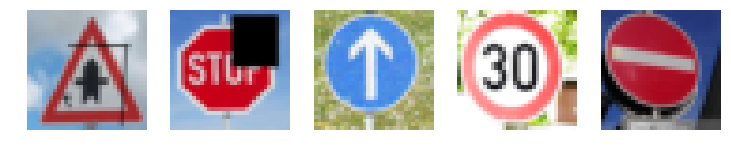

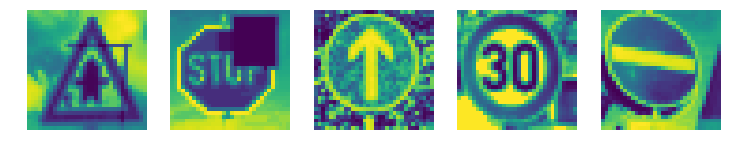

In [17]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
import os
import scipy.misc

Image_Folder = "extra_data/"

def resize_image(image_file):
    image = plt.imread(Image_Folder + image_file)
    return scipy.misc.imresize(image, (32, 32))

resized_image_data = [(resize_image(image), image[:-4]) for image in os.listdir(Image_Folder)]
def display_images(imgs_data):
    index = 1
    plt.figure(figsize=(15,10))
    for img, name in imgs_data:
        plt.subplot(1, 6, index)
        plt.imshow(img)

        plt.axis('off')
        index += 1
    plt.show()
    
display_images(resized_image_data)
def display_images2(imgs_data):
    index = 1
    plt.figure(figsize=(15,10))
    for img, name in imgs_data:
        plt.subplot(2, 6, index)
        plt.imshow(transform_img(img))
        plt.axis('off')
        index += 1
    plt.show()

display_images2(resized_image_data)


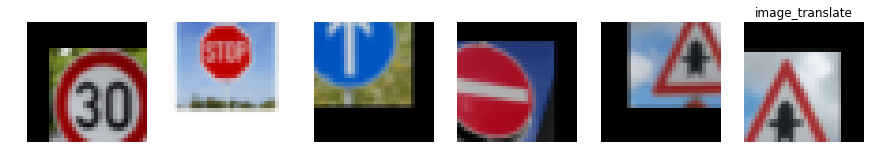

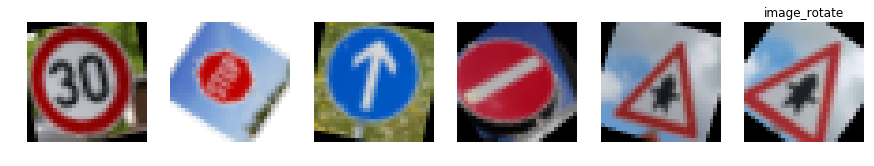

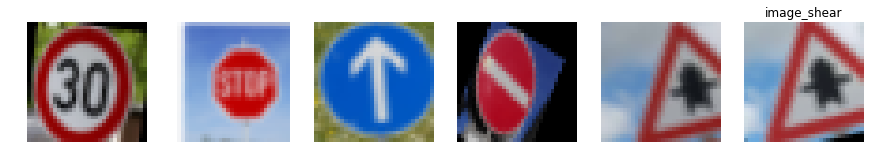

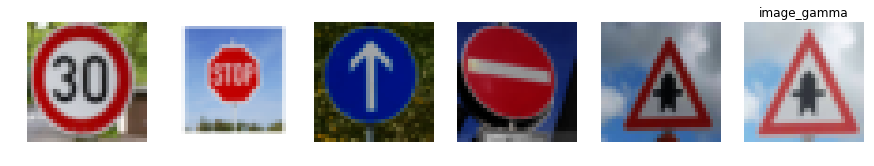

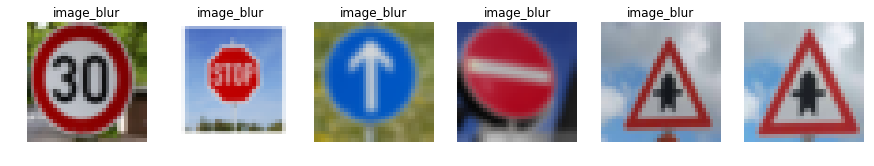

In [284]:

def display_images_translation(imgs_data):
    index = 1
    plt.figure(figsize=(15,10))
    
    for img, name in imgs_data:
        plt.subplot(2, 6, index)
        plt.imshow(image_translate(img))
        
        plt.axis('off')
        index += 1
    plt.title('image_translate')
    plt.show()
    
def display_images_rotate(imgs_data):
    index = 1
    plt.figure(figsize=(15,10))
    for img, name in imgs_data:
        plt.subplot(2, 6, index)
        plt.imshow(image_rotate(img))
        plt.axis('off')
        index += 1
    plt.title('image_rotate')
    plt.show()
def display_image_shear(imgs_data):
    index = 1
    plt.figure(figsize=(15,10))
    for img, name in imgs_data:
        plt.subplot(2, 6, index)
        plt.imshow(image_shear(img))
        plt.axis('off')
        index += 1
    plt.title('image_shear')
    plt.show()
def display_image_gamma(imgs_data):
    index = 1
    plt.figure(figsize=(15,10))
    for img, name in imgs_data:
        plt.subplot(2, 6, index)
        plt.imshow(image_gamma(img))
        plt.axis('off')
        index += 1
    plt.title('image_gamma')
    plt.show()
def display_image_blur(imgs_data):
    index = 1
    plt.figure(figsize=(15,10))
    for img, name in imgs_data:
        plt.title('image_blur')
        plt.subplot(2, 6, index)
        plt.imshow(image_blur(img))
        plt.axis('off')
        index += 1
    
    plt.show()
display_images_translation(resized_image_data)
display_images_rotate(resized_image_data)
display_image_shear(resized_image_data)
display_image_gamma(resized_image_data)
display_image_blur(resized_image_data)


## Question 6: 
Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook.

**Answer** The traffice are download from the web, there are not from the data sets.


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [84]:


signnames = pd.read_csv('./signnames.csv')
signnames.set_index('ClassId',inplace=True)

for true_label,row in zip(test_image_lable,predicted_proba):
    top5k = np.argsort(row)[::-1][:5]
    top5p = np.sort(row)[::-1][:5]
    print('Top 5 Labels ------> \"{}\":'.format(signnames.loc[int(true_label)].SignName))
    for k,p in zip(top5k,top5p):
          print(' - \'{}\' with prob = {:.5f} '.format(signnames.loc[k].SignName,p))
    print()

Top 5 Labels ------> "Right-of-way at the next intersection":
 - 'Right-of-way at the next intersection' with prob = 0.96756 
 - 'Beware of ice/snow' with prob = 0.03173 
 - 'Road work' with prob = 0.00022 
 - 'Double curve' with prob = 0.00021 
 - 'Children crossing' with prob = 0.00016 

Top 5 Labels ------> "Stop":
 - 'Stop' with prob = 0.84335 
 - 'Roundabout mandatory' with prob = 0.09127 
 - 'Keep right' with prob = 0.02986 
 - 'Keep left' with prob = 0.01187 
 - 'Turn right ahead' with prob = 0.00789 

Top 5 Labels ------> "Ahead only":
 - 'Ahead only' with prob = 0.40103 
 - 'Yield' with prob = 0.11454 
 - 'Priority road' with prob = 0.06607 
 - 'Go straight or right' with prob = 0.04422 
 - 'Turn right ahead' with prob = 0.04275 

Top 5 Labels ------> "Speed limit (30km/h)":
 - 'Speed limit (50km/h)' with prob = 0.97408 
 - 'Speed limit (30km/h)' with prob = 0.02543 
 - 'Speed limit (60km/h)' with prob = 0.00026 
 - 'Speed limit (80km/h)' with prob = 0.00011 
 - 'Speed limit (

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.